In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Pandas = Panel Data
Pandas documentation: https://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

In [28]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrame

In [29]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [30]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.593080,0.839098,-1.050039,-0.571138
2013-01-02,2.025947,0.944266,-1.158757,-0.795386
2013-01-03,1.213073,0.155328,-0.477911,-0.751453
2013-01-04,0.706922,-0.854770,1.015118,-1.447287
2013-01-05,0.508024,-1.122000,-0.188895,-0.394141
2013-01-06,-1.395866,-0.894349,0.630084,0.121775


### Creating a DataFrame by passing a dict of objects

In [31]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Viewing data

In [32]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [33]:
df.head()

,A,B,C,D
2013-01-01,0.593080,0.839098,-1.050039,-0.571138
2013-01-02,2.025947,0.944266,-1.158757,-0.795386
2013-01-03,1.213073,0.155328,-0.477911,-0.751453
2013-01-04,0.706922,-0.854770,1.015118,-1.447287
2013-01-05,0.508024,-1.122000,-0.188895,-0.394141


In [34]:
df.tail(2)

,A,B,C,D
2013-01-05,0.508024,-1.122000,-0.188895,-0.394141
2013-01-06,-1.395866,-0.894349,0.630084,0.121775


In [35]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.608530,-0.155405,-0.205067,-0.639605
std,1.132446,0.923507,0.881424,0.516482
min,-1.395866,-1.122000,-1.158757,-1.447287
25%,0.529288,-0.884454,-0.907007,-0.784403
50%,0.650001,-0.349721,-0.333403,-0.661296
75%,1.086535,0.668155,0.425340,-0.438391
max,2.025947,0.944266,1.015118,0.121775


In [36]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

# Transposing data

In [37]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.593080,2.025947,1.213073,0.706922,0.508024,-1.395866
B,0.839098,0.944266,0.155328,-0.854770,-1.122000,-0.894349
C,-1.050039,-1.158757,-0.477911,1.015118,-0.188895,0.630084
D,-0.571138,-0.795386,-0.751453,-1.447287,-0.394141,0.121775


# Data selection

**One column = Series**

In [38]:
print(type(df['A']))
df['A']

<class 'pandas.core.series.Series'>


2013-01-01    0.593080
2013-01-02    2.025947
2013-01-03    1.213073
2013-01-04    0.706922
2013-01-05    0.508024
2013-01-06   -1.395866
Freq: D, Name: A, dtype: float64

**Slicing**

In [39]:
df[0:3]

,A,B,C,D
2013-01-01,0.593080,0.839098,-1.050039,-0.571138
2013-01-02,2.025947,0.944266,-1.158757,-0.795386
2013-01-03,1.213073,0.155328,-0.477911,-0.751453


**Selection by label**

In [40]:
df.loc[dates[0]]

A    0.593080
B    0.839098
C   -1.050039
D   -0.571138
Name: 2013-01-01 00:00:00, dtype: float64

In [41]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.593080,0.839098
2013-01-02,2.025947,0.944266
2013-01-03,1.213073,0.155328
2013-01-04,0.706922,-0.854770
2013-01-05,0.508024,-1.122000
2013-01-06,-1.395866,-0.894349


**Selection by Position**

In [42]:
df.iloc[1,1]

0.944266377614238

In [43]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.706922,-0.85477
2013-01-05,0.508024,-1.12200


**Boolean Indexing**

In [44]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.593080,0.839098,-1.050039,-0.571138
2013-01-02,2.025947,0.944266,-1.158757,-0.795386
2013-01-03,1.213073,0.155328,-0.477911,-0.751453
2013-01-04,0.706922,-0.854770,1.015118,-1.447287
2013-01-05,0.508024,-1.122000,-0.188895,-0.394141


In [45]:
df[df > 0]

,A,B,C,D
2013-01-01,0.593080,0.839098,NaN,NaN
2013-01-02,2.025947,0.944266,NaN,NaN
2013-01-03,1.213073,0.155328,NaN,NaN
2013-01-04,0.706922,NaN,1.015118,NaN
2013-01-05,0.508024,NaN,NaN,NaN
2013-01-06,NaN,NaN,0.630084,0.121775


**Setting values by label**

In [46]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.839098,-1.050039,-0.571138
2013-01-02,2.025947,0.944266,-1.158757,-0.795386
2013-01-03,1.213073,0.155328,-0.477911,-0.751453
2013-01-04,0.706922,-0.854770,1.015118,-1.447287
2013-01-05,0.508024,-1.122000,-0.188895,-0.394141
2013-01-06,-1.395866,-0.894349,0.630084,0.121775


# Missing Data

In [47]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2013-01-01,0.000000,0.839098,-1.050039,-0.571138,NaN
2013-01-02,2.025947,0.944266,-1.158757,-0.795386,NaN
2013-01-03,1.213073,0.155328,-0.477911,-0.751453,NaN
2013-01-04,0.706922,-0.854770,1.015118,-1.447287,NaN


In [18]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0,NaN,NaN,NaN,1.0
2013-01-02,NaN,NaN,NaN,NaN,1.0
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN


In [19]:
df1.dropna(how='any')

,A,B,C,D,E


In [20]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0,5,5.0,5.0,1.0
2013-01-02,5,5,5.0,5.0,1.0
2013-01-03,5,5,5.0,5.0,5.0
2013-01-04,5,5,5.0,5.0,5.0


**Boolean mask where values are NaN**

In [21]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,True,True,True,False
2013-01-02,True,True,True,True,False
2013-01-03,True,True,True,True,True
2013-01-04,True,True,True,True,True


# Operations

In [25]:
df.mean()

C:\Users\Martin\AppData\Local\Temp\ipykernel_10104\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


C   -1.000583
D    0.058755
dtype: float64

In [23]:
df.mean(axis=0)
# df.mean(axis=1)

C:\Users\Martin\AppData\Local\Temp\ipykernel_10104\694470385.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


C   -1.000583
D    0.058755
dtype: float64

### Applying functions to the data

In [26]:
df.apply(np.cumsum)

TypeError: can only concatenate str (not "int") to str

In [27]:
df.apply(lambda x: x.max() - x.min())

TypeError: '>=' not supported between instances of 'str' and 'int'

# Merging data

## Concat

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

In [ ]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

In [ ]:
pd.concat(pieces)


## Join

In [ ]:
left = pd.DataFrame({'key': ['k1', 'k2'], 'lval': [1, 2]})
left

In [ ]:
right = pd.DataFrame({'key': ['k1', 'k2'], 'rval': [3, 4]})
right

In [ ]:
pd.merge(left, right, on='key')

## Append

DataFrame.append() & Series.append() is being deprecated,

use .concat() -- https://pandas.pydata.org/docs/whatsnew/v1.4.0.html#whatsnew-140-deprecations-frame-series-append

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

In [ ]:
s = df.iloc[3]
s

In [ ]:
df.append(s, ignore_index=True)

## Grouping

In [13]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.990664,-0.590694
1,bar,one,-0.011326,0.895659
2,foo,two,-1.473875,-1.101245
3,bar,three,-1.145785,-0.082737
4,foo,two,-0.595889,-0.794296
5,bar,two,-2.034207,1.546807
6,foo,one,-1.796911,0.078339
7,foo,three,1.043988,0.518210


In [14]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.191317,2.359728
foo,-4.813349,-1.889686


In [ ]:
df.groupby(['A','B']).sum()

## Reshaping

### Stack

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

In [ ]:
df2 = df[:4]
df2

In [ ]:
stacked = df2.stack()
stacked

**With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:**

In [ ]:
stacked.unstack()

### Pivot Tables

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

# Time Series

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

In [ ]:
ts.resample('5Min').sum()

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

# Categoricals

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad",]
df["grade"]

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

In [ ]:
df.sort_values(by="grade")

In [ ]:
df.groupby("grade").size()

# Plotting

In [48]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.362371
2000-01-02    0.309345
2000-01-03    0.499983
2000-01-04    1.320460
2000-01-05   -0.244312
                ...   
2002-09-22   -1.987500
2002-09-23    0.013711
2002-09-24    0.487752
2002-09-25   -0.282083
2002-09-26   -1.256829
Freq: D, Length: 1000, dtype: float64

In [49]:
ts = ts.cumsum()
ts

2000-01-01     0.362371
2000-01-02     0.671716
2000-01-03     1.171699
2000-01-04     2.492159
2000-01-05     2.247847
                ...    
2002-09-22   -46.911599
2002-09-23   -46.897889
2002-09-24   -46.410136
2002-09-25   -46.692220
2002-09-26   -47.949048
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

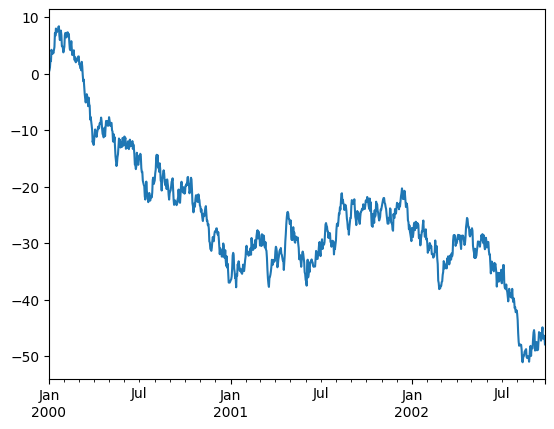

In [50]:
ts.plot()

In [51]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,0.633473,0.784188,-0.344994,-0.890721
2000-01-02,-0.557002,1.795424,-0.285998,0.516770
2000-01-03,0.518624,0.707010,1.070306,0.461469
2000-01-04,-0.898953,0.353121,-1.434877,-0.685425
2000-01-05,0.671385,-0.615284,-1.719515,-1.432667
...,...,...,...,...
2002-09-22,-0.870583,-1.075266,0.411193,-0.878497
2002-09-23,-0.566055,-0.306512,1.411345,-1.542838
2002-09-24,-0.837397,-1.184779,0.738321,-0.096512
2002-09-25,-0.405232,-0.855514,0.067508,0.798481


In [52]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.633473,0.784188,-0.344994,-0.890721
2000-01-02,0.076471,2.579613,-0.630992,-0.373951
2000-01-03,0.595095,3.286623,0.439314,0.087519
2000-01-04,-0.303857,3.639744,-0.995563,-0.597906
2000-01-05,0.367528,3.024460,-2.715078,-2.030573
...,...,...,...,...
2002-09-22,-46.019949,36.587501,-57.458272,23.939542
2002-09-23,-46.586003,36.280989,-56.046927,22.396704
2002-09-24,-47.423400,35.096211,-55.308606,22.300192
2002-09-25,-47.828632,34.240696,-55.241099,23.098673


<Figure size 640x480 with 0 Axes>

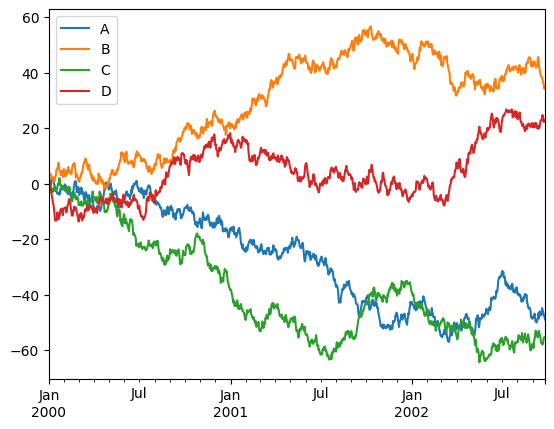

In [53]:
plt.figure() 
df.plot() 
plt.legend(loc='best')

# 100-pandas-puzzles

**https://github.com/FIIT-IAU/100-pandas-puzzles** (forked from https://github.com/ajcr/100-pandas-puzzles)
